In [80]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder

In [7]:
df = pd.read_csv('Diamonds Prices2022.csv')

In [8]:
df = df.drop('Unnamed: 0', axis=1)

In [9]:
df['dimensions'] = df['x'] * df['y'] * df['z']
df = df[['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'dimensions', 'price']]
labelencoder = LabelEncoder()
df['cut'] = labelencoder.fit_transform(df['cut'])
df['color'] = labelencoder.fit_transform(df['color'])
df['clarity'] = labelencoder.fit_transform(df['clarity'])

In [10]:
X = df.drop(['price'], axis=1)
y = df['price']

In [54]:
y.unique()

array([0, 5, 6, 7, 8, 9, 1, 2, 3, 4])

In [55]:
X.head()

,carat,cut,color,clarity,depth,table,dimensions
0,0.23,2,1,3,61.5,55.0,38.202030
1,0.21,3,1,2,59.8,61.0,34.505856
2,0.23,1,1,4,56.9,65.0,38.076885
3,0.29,3,5,5,62.4,58.0,46.724580
4,0.31,1,6,3,63.3,58.0,51.917250


In [57]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

In [59]:
X_train.head()

,carat,cut,color,clarity,depth,table,dimensions
14542,1.21,3,4,2,62.5,60.0,190.961390
41760,0.43,2,1,7,62.0,57.0,70.948108
29645,0.35,4,3,4,62.5,55.0,58.073015
20319,1.22,3,2,5,62.0,58.0,201.350604
23341,0.30,4,4,2,63.0,54.0,49.574700


In [61]:
k_range = range(5, 150, 5)
kmeans_per_k = []
for k in k_range:
    print("k={}".format(k))
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X_train)
    kmeans_per_k.append(kmeans)

k=5
k=10
k=15
k=20
k=25
k=30
k=35
k=40
k=45
k=50
k=55
k=60
k=65
k=70
k=75
k=80
k=85
k=90
k=95
k=100
k=105
k=110
k=115
k=120
k=125
k=130
k=135
k=140
k=145


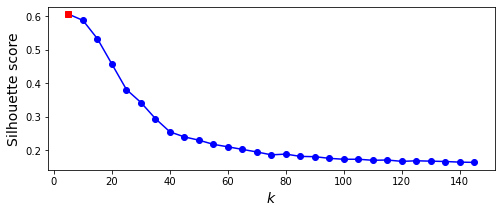

In [67]:
silhouette_scores = [silhouette_score(X_train, model.labels_)
                     for model in kmeans_per_k]
best_index = np.argmax(silhouette_scores)
best_k = k_range[best_index]
best_score = silhouette_scores[best_index]

plt.figure(figsize=(8, 3))
plt.plot(k_range, silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.plot(best_k, best_score, "rs")
plt.show()

In [68]:
best_k

5

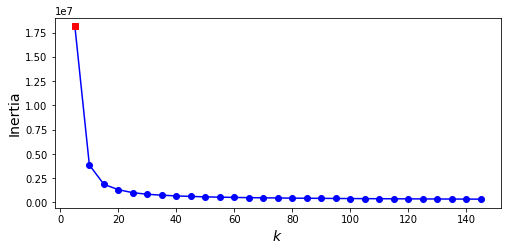

In [69]:
inertias = [model.inertia_ for model in kmeans_per_k]
best_inertia = inertias[best_index]

plt.figure(figsize=(8, 3.5))
plt.plot(k_range, inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.plot(best_k, best_inertia, "rs")
plt.show()

In [70]:
best_model = kmeans_per_k[best_index]

In [71]:
clf = RandomForestClassifier(n_estimators=150, random_state=42)
clf.fit(X_train, y_train)
clf.score(X_val, y_val)

0.7602827018885413

In [72]:
X_train_reduced = best_model.transform(X_train)
X_valid_reduced = best_model.transform(X_val)
X_test_reduced = best_model.transform(X_test)

clf = RandomForestClassifier(n_estimators=150, random_state=42)
clf.fit(X_train_reduced, y_train)

clf.score(X_valid_reduced, y_val)

0.5066620322094775

In [74]:
for n_clusters in k_range:
    pipeline = Pipeline([
        ("kmeans", KMeans(n_clusters=n_clusters, random_state=42)),
        ("forest_clf", RandomForestClassifier(n_estimators=150, random_state=42))
    ])
    pipeline.fit(X_train, y_train)
    print(n_clusters, pipeline.score(X_val, y_val))

5 0.5066620322094775
10 0.5058510022013671
15 0.5075889236473178
20 0.5165102537365311
25 0.5179005908932917
30 0.5219557409338431
35 0.5234619395203337
40 0.5257791681149345
45 0.54072529255011
50 0.5274012281311551
55 0.5397984011122697
60 0.5411887382690302
65 0.5447804425906616
70 0.554049356969065
75 0.5547445255474452
80 0.5599582898852972
85 0.5724713242961418
90 0.5762947514772332
95 0.5745568300312826
100 0.5693430656934306
105 0.5794230100799443
110 0.5789595643610242
115 0.5860271115745568
120 0.5847526358475263
125 0.5915884602015989
130 0.5907774301934886
135 0.597381531688101
140 0.5969180859691808
145 0.6008573745800023


In [76]:
X_train_extended = np.c_[X_train, X_train_reduced]
X_valid_extended = np.c_[X_val, X_valid_reduced]
X_test_extended = np.c_[X_test, X_test_reduced]

In [77]:
clf = RandomForestClassifier(n_estimators=150, random_state=42)
clf.fit(X_train_extended, y_train)
clf.score(X_valid_extended, y_val)

0.740470397404704